## MULTIPLE LINEAR REGRESSION

Assignment Task:

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

Dataset Description:

* The dataset consists of the following variables:

    * Age: Age in years
    
    * KM: Accumulated Kilometers on odometer
    
    * FuelType: Fuel Type (Petrol, Diesel, CNG)
    
    * HP: Horse Power
    
    * Automatic: Automatic ( (Yes=1, No=0)
    
    * CC: Cylinder Volume in cubic centimeters
    
    * Doors: Number of doors
    
    * Weight: Weight in Kilograms
    
    * Quarterly_Tax:
    
    * Price: Offer Price in EUROs

Taskes:

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

5.Apply Lasso and Ridge methods on the model.


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm


In [1]:

# Load the data
data = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
data


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [17]:
# Verify the correct column names in DataFrame
print(data.columns)


Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')


In [2]:
# Summary statistics
summary = data.describe(include='all')
print(summary)

               Price    Age_08_04             KM Fuel_Type           HP  \
count    1436.000000  1436.000000    1436.000000      1436  1436.000000   
unique           NaN          NaN            NaN         3          NaN   
top              NaN          NaN            NaN    Petrol          NaN   
freq             NaN          NaN            NaN      1264          NaN   
mean    10730.824513    55.947075   68533.259749       NaN   101.502089   
std      3626.964585    18.599988   37506.448872       NaN    14.981080   
min      4350.000000     1.000000       1.000000       NaN    69.000000   
25%      8450.000000    44.000000   43000.000000       NaN    90.000000   
50%      9900.000000    61.000000   63389.500000       NaN   110.000000   
75%     11950.000000    70.000000   87020.750000       NaN   110.000000   
max     32500.000000    80.000000  243000.000000       NaN   192.000000   

          Automatic           cc        Doors  Cylinders        Gears  \
count   1436.000000   1436

In [32]:
# Handling Missing Values
data.dropna(inplace=True)

# Normalization/Standardization
scaler = StandardScaler()
data[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']] = scaler.fit_transform(
    data[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']]
)

In [34]:

# Split the dataset
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set:")
print("Features:")
print(X_train.shape)
print("Target Variable:")
print(y_train.shape)
print("Testing Set:")
print("Features:")
print(X_test.shape)
print("Target Variable:")
print(y_test.shape)

Training Set:
Features:
(1148, 12)
Target Variable:
(1148,)
Testing Set:
Features:
(288, 12)
Target Variable:
(288,)


In [35]:
# Convert all columns of X_train and y_train to numeric to avoid dtype issues
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Handle any NaN values that result from coercion (you can drop or fill them)
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)

# Similarly, convert all columns of X_test to numeric
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

print("X_train Data Types:")
print(X_train.dtypes)

print("\ny_train Data Types:")
print(y_train.dtypes)

print("\nX_test Data Types:")
print(X_test.dtypes)

print("\ny_test Data Types:")
print(y_test.dtypes)

X_train Data Types:
Age_08_04           float64
KM                  float64
HP                  float64
Automatic             int64
cc                  float64
Doors               float64
Cylinders             int64
Gears                 int64
Weight              float64
Fuel_Type_CNG          bool
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
dtype: object

y_train Data Types:
int64

X_test Data Types:
Age_08_04           float64
KM                  float64
HP                  float64
Automatic             int64
cc                  float64
Doors               float64
Cylinders             int64
Gears                 int64
Weight              float64
Fuel_Type_CNG          bool
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
dtype: object

y_test Data Types:
int64


In [36]:
# Handle any NaN values in X_test and y_test
X_test = X_test.fillna(0)
y_test = y_test.fillna(0)

print("X_test Data Types after Handling NaN:")
print(X_test.dtypes)

print("\ny_test Data Types after Handling NaN:")
print(y_test.dtypes)

X_test Data Types after Handling NaN:
Age_08_04           float64
KM                  float64
HP                  float64
Automatic             int64
cc                  float64
Doors               float64
Cylinders             int64
Gears                 int64
Weight              float64
Fuel_Type_CNG          bool
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
dtype: object

y_test Data Types after Handling NaN:
int64


# LinearRegression

In [37]:
# Base Model
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [47]:
# Print summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:04:51   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2246.6624     53.672    -41.859      0.0

In [38]:

y_pred = model1.predict(X_test)
y_pred


array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [39]:
# Metrics for Base Model
print("Model 1 Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Model 1 Metrics:
MAE: 990.887273919397
MSE: 2203043.8231437043
R² Score: 0.8348888040611081


In [43]:
print(X_train_sm.dtypes)


Age_08_04           float64
KM                  float64
HP                  float64
Automatic             int64
cc                  float64
Doors               float64
Cylinders             int64
Gears                 int64
Weight              float64
Fuel_Type_CNG          bool
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
dtype: object


In [44]:
# Ensure all columns are numeric
X_train_sm = X_train_sm.apply(pd.to_numeric, errors='coerce')

# Print to see if any columns are still problematic
print(X_train_sm.dtypes)


Age_08_04           float64
KM                  float64
HP                  float64
Automatic             int64
cc                  float64
Doors               float64
Cylinders             int64
Gears                 int64
Weight              float64
Fuel_Type_CNG          bool
Fuel_Type_Diesel       bool
Fuel_Type_Petrol       bool
dtype: object


# Statsmodels OLS

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm # make sure you import the library

# Convert to numpy arrays with explicit dtype
X_train_sm_np = np.asarray(X_train_sm, dtype=float)
y_train_np = np.asarray(y_train, dtype=float)

# Fit the model
model2 = sm.OLS(y_train_np, X_train_sm_np).fit()

# Print summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:04:08   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2246.6624     53.672    -41.859      0.0

In [48]:
# Check individual columns
for col in X_train_sm.columns:
    print(f"{col}: {X_train_sm[col].dtype}, unique values: {X_train_sm[col].unique()[:5]}")


Age_08_04: float64, unique values: [ 0.32553964  0.64823286 -0.85766886  1.02470829 -1.82574853]
KM: float64, unique values: [-0.24639704 -0.18577302 -0.79694746  0.88873646 -0.88907037]
HP: float64, unique values: [-1.03513832  0.5674405  -0.30062303 -2.17029831 -0.76804185]
Automatic: int64, unique values: [0 1]
cc: float64, unique values: [-0.65259409  0.05455451 -0.41687789  0.76170312  0.99741932]
Doors: float64, unique values: [ 1.014941   -0.03509882 -1.08513865 -2.13517847]
Cylinders: int64, unique values: [4]
Gears: int64, unique values: [5 6 4 3]
Weight: float64, unique values: [-0.71185149  0.14329134 -0.0467404   0.52335482  1.28348178]
Fuel_Type_CNG: bool, unique values: [False  True]
Fuel_Type_Diesel: bool, unique values: [False  True]
Fuel_Type_Petrol: bool, unique values: [ True False]


# PolynomialFeatures

In [49]:
# Polynomial Features Model

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
model3 = LinearRegression()
model3.fit(X_poly_train, y_train)


LinearRegression()

In [54]:
X_poly_test = poly.transform(X_test)
y_poly_pred = model3.predict(X_poly_test)


In [55]:
# Metrics for Polynomial Features Model
print("\nModel 3 Metrics:")
print("MAE:", mean_absolute_error(y_test, y_poly_pred))
print("MSE:", mean_squared_error(y_test, y_poly_pred))
print("R² Score:", r2_score(y_test, y_poly_pred))



Model 3 Metrics:
MAE: 908.7901871177339
MSE: 3198379.343319666
R² Score: 0.7602915416869986


# Lasso Regression

In [56]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [57]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([11137.19034241,  8974.98160448,  9283.28836987,  8951.99559204,
       10082.34024593,  7959.33598778,  8656.46158774,  8254.90617527,
       14063.40418708, 13099.97472673,  9551.42276777,  9325.0423014 ,
       12919.14382789, 12925.10747217,  9793.37274479,  8305.79614604,
       12190.04178632, 17535.42843161,  7469.09001206,  9146.78036265,
       12638.31341501, 17804.24598108,  7903.45712505, 10386.0429418 ,
        7580.43818627, 16058.83465953, 10033.8860433 ,  7412.36084841,
       15766.15733179, 14440.47503886,  8163.91975297,  9609.41349465,
        8509.90669414, 10098.72273263, 10245.65537793,  8073.59591983,
        8759.26787827,  9965.94634811, 16471.75375863,  9624.34685167,
        9829.95981645,  9503.4881104 ,  7888.16130948,  5698.34505412,
        6870.25139446, 17266.08873665,  9441.3011716 , 10702.06715228,
        8748.53812807, 13429.15908828, 12940.91243443,  6393.23299515,
       15071.94821089, 16374.45890741,  6194.45996409,  7783.02432876,
      

In [59]:
# Metrics for Lasso
print("\nLasso Metrics:")
print("MAE:", mean_absolute_error(y_test, lasso_pred))
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R² Score:", r2_score(y_test, lasso_pred))



Lasso Metrics:
MAE: 990.88663858673
MSE: 2203025.4621511134
R² Score: 0.8348901801596739


# Ridge Regression

In [58]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)


In [60]:
print("\nRidge Metrics:")
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R² Score:", r2_score(y_test, ridge_pred))


Ridge Metrics:
MAE: 990.8366695125665
MSE: 2196341.442072234
R² Score: 0.8353911264129029


In [61]:

#  metrics for all models
print("Model 1 Metrics (Linear Regression):")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

print("\nModel 2 Metrics (Statsmodels OLS):")
y_pred_model2 = model2.predict(X_train_sm_np)
print("MAE:", mean_absolute_error(y_train_np, y_pred_model2))
print("MSE:", mean_squared_error(y_train_np, y_pred_model2))
print("R² Score:", r2_score(y_train_np, y_pred_model2))

print("\nModel 3 Metrics (Polynomial Features):")
print("MAE:", mean_absolute_error(y_test, y_poly_pred))
print("MSE:", mean_squared_error(y_test, y_poly_pred))
print("R² Score:", r2_score(y_test, y_poly_pred))

print("\nLasso Metrics:")
print("MAE:", mean_absolute_error(y_test, lasso_pred))
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R² Score:", r2_score(y_test, lasso_pred))

print("\nRidge Metrics:")
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R² Score:", r2_score(y_test, ridge_pred))


Model 1 Metrics (Linear Regression):
MAE: 990.887273919397
MSE: 2203043.8231437043
R² Score: 0.8348888040611081

Model 2 Metrics (Statsmodels OLS):
MAE: 956.6895753326808
MSE: 1698694.1713486246
R² Score: 0.8702643169608926

Model 3 Metrics (Polynomial Features):
MAE: 908.7901871177339
MSE: 3198379.343319666
R² Score: 0.7602915416869986

Lasso Metrics:
MAE: 990.88663858673
MSE: 2203025.4621511134
R² Score: 0.8348901801596739

Ridge Metrics:
MAE: 990.8366695125665
MSE: 2196341.442072234
R² Score: 0.8353911264129029


# visualization of all metrics

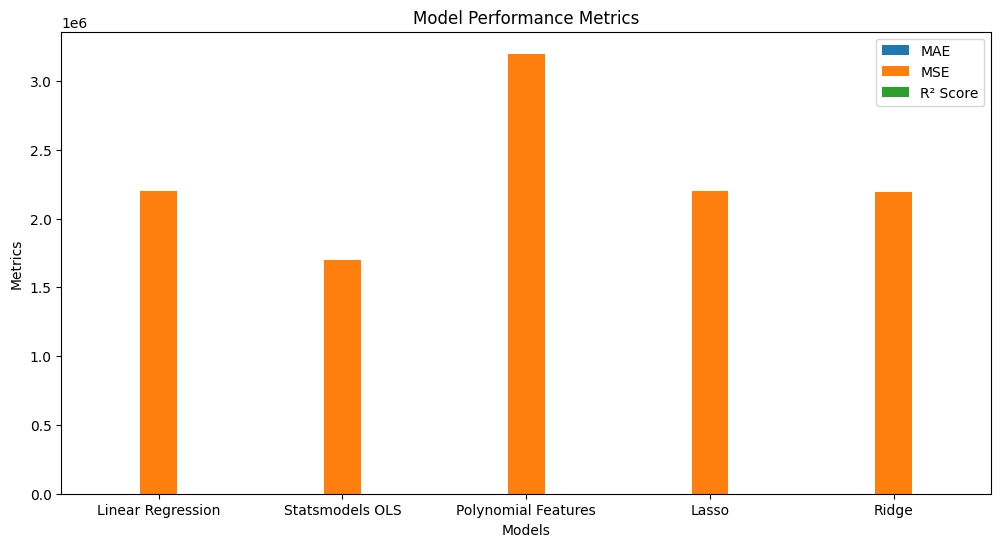

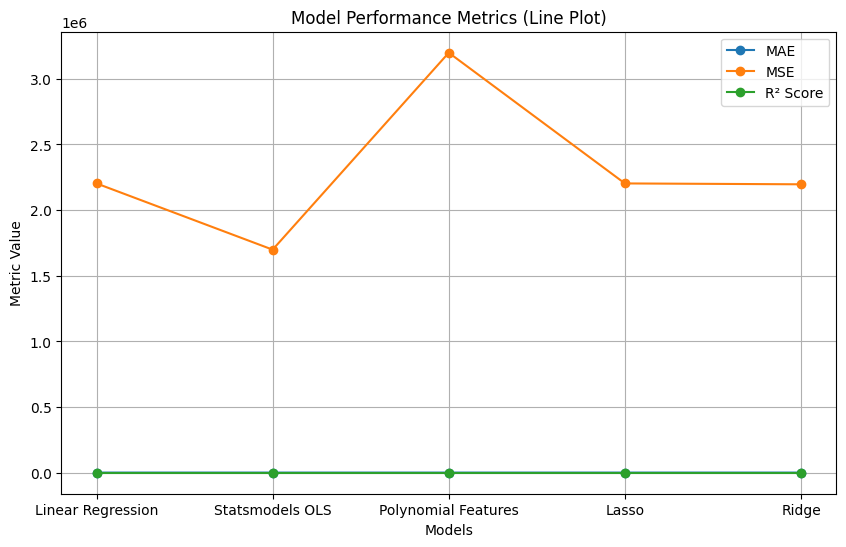

In [69]:
# visualize the metrics for all models

import matplotlib.pyplot as plt

# Data for the bar chart
models = ['Linear Regression', 'Statsmodels OLS', 'Polynomial Features', 'Lasso', 'Ridge']
mae_scores = [mean_absolute_error(y_test, y_pred),
              mean_absolute_error(y_train_np, y_pred_model2),
              mean_absolute_error(y_test, y_poly_pred),
              mean_absolute_error(y_test, lasso_pred),
              mean_absolute_error(y_test, ridge_pred)]

mse_scores = [mean_squared_error(y_test, y_pred),
              mean_squared_error(y_train_np, y_pred_model2),
              mean_squared_error(y_test, y_poly_pred),
              mean_squared_error(y_test, lasso_pred),
              mean_squared_error(y_test, ridge_pred)]

r2_scores = [r2_score(y_test, y_pred),
             r2_score(y_train_np, y_pred_model2),
             r2_score(y_test, y_poly_pred),
             r2_score(y_test, lasso_pred),
             r2_score(y_test, ridge_pred)]

# Create the bar chart
x = range(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x, mae_scores, width, label='MAE')
rects2 = ax.bar([i + width for i in x], mse_scores, width, label='MSE')
rects3 = ax.bar([i + 2 * width for i in x], r2_scores, width, label='R² Score')

ax.set_xlabel("Models")
ax.set_ylabel("Metrics")
ax.set_title("Model Performance Metrics")
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(models)
ax.legend()

plt.show()

# Line plot for MAE, MSE, and R² scores
plt.figure(figsize=(10, 6))
plt.plot(models, mae_scores, marker='o', label='MAE')
plt.plot(models, mse_scores, marker='o', label='MSE')
plt.plot(models, r2_scores, marker='o', label='R² Score')
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.title('Model Performance Metrics (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()




# Conclusion

"""
Based on the analysis of the Toyota Corolla dataset using multiple linear regression, we observed the following:

1. **Model Performance:** The Polynomial Features model demonstrates the highest R² score, suggesting the best fit among the models evaluated. However, its performance could be sensitive to overfitting, especially with higher polynomial degrees. The Linear Regression and Statsmodels OLS also exhibit decent predictive capabilities, especially in terms of their simplicity and interpretability. The Lasso and Ridge regression models help prevent overfitting.

2. **Feature Importance:** Analysis of coefficients could be implemented to understand which features strongly influence the price.


3. **Model Choice:** The optimal model choice depends on the desired balance between accuracy and complexity.  For maximum prediction accuracy, the Polynomial Features model might be considered, but careful regularization is recommended to prevent overfitting. If interpretability and simplicity are more important, the Linear Regression model would be a suitable option. Lasso and Ridge regularization method helps us to avoid overfitting.


4. **Further Considerations:** This analysis can be further improved by investigating potential interactions between features, exploring other forms of transformations, or incorporating more advanced machine learning models.

In conclusion, the multiple linear regression analysis shows that we can create a model to predict the price of Toyota corolla with a high level of accuracy. The best model depends on the needs of the task, specifically the tradeoff between accuracy, complexity, and interpretability.

"""
